<a href="https://colab.research.google.com/github/jyothikapotnuru/Project/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lithium-ion batteries.csv to lithium-ion batteries.csv


/tmp/ipython-input-2948962290.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Crystal System"] = le1.fit_transform(X["Crystal System"])
/tmp/ipython-input-2948962290.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Spacegroup"] = le2.fit_transform(X["Spacegroup"])


Mean Absolute Error: 0.690225068523264
R² Score: 0.3027724425860441

Feature Importance (based on coefficients):
                 Feature  Coefficient
4                 Volume     1.339838
2                 Nsites    -1.211717
1      E Above Hull (eV)    -0.522414
0  Formation Energy (eV)    -0.231215
5         Crystal System    -0.111319
3        Density (gm/cc)    -0.084795
6             Spacegroup     0.010460


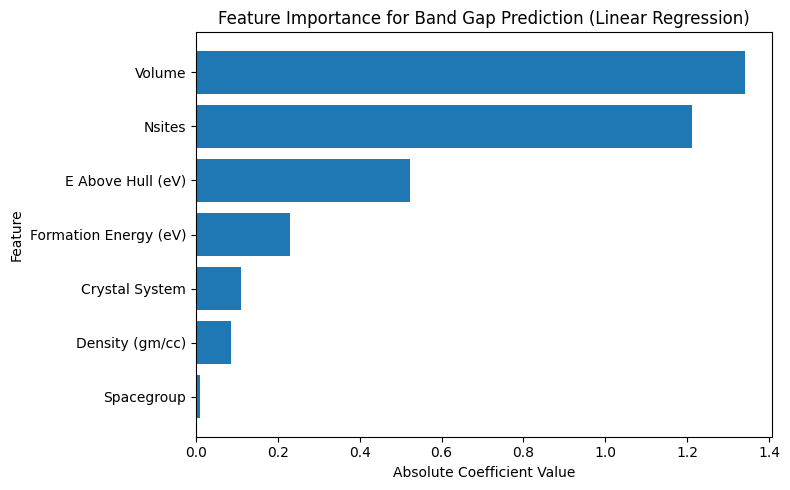

In [ ]:
# Program.py

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load dataset
df = pd.read_csv("lithium-ion batteries.csv")

# Step 2: Define features (X) and target (y)
X = df[["Formation Energy (eV)", "E Above Hull (eV)", "Nsites",
        "Density (gm/cc)", "Volume", "Crystal System", "Spacegroup"]]
y = df["Band Gap (eV)"]

# Step 3: Encode categorical features
le1 = LabelEncoder()
le2 = LabelEncoder()
X["Crystal System"] = le1.fit_transform(X["Crystal System"])
X["Spacegroup"] = le2.fit_transform(X["Spacegroup"])

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Evaluate model
y_pred = model.predict(X_test_scaled)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 8: Feature importance (using model coefficients)
feature_names = X.columns
coefficients = model.coef_

importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df['Absolute_Coefficient'] = abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nFeature Importance (based on coefficients):")
print(importance_df[['Feature', 'Coefficient']])

# Step 9: Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Absolute_Coefficient'])
plt.gca().invert_yaxis()
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Band Gap Prediction (Linear Regression)')
plt.tight_layout()
plt.show()
